On 2018, Kaggle launched a competition in association with Jigsaw/Conversation AI to classify toxic comments. The original competition can be viewed [here](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge). A toxic comment is a comment that is rude, disrespectful or otherwise likely to make someone leave a discussion. The goal of that competition was to build a multi-headed model that’s capable of detecting different types of of toxicity like threats, obscenity, insults, and identity-based hate.

However, the models developed in that competition unfortunately associated the targetted group with toxicity, i.e. "gay". For example, a comment like "I am a gay woman" would be classified as toxic. This happened as the examples of identities associated with toxicity outnumbered neutral comments regarding the same identity.

Therefore, the same team launched a new competition to recognize unintended bias towards identities. We are asked to use a dataset labeled with the associated identity. Let's look into the dataset and understand it first, so we can create a model that can better deal with bias.

At the time I started this notebook, I looked at the kernel https://www.kaggle.com/nz0722/simple-eda-text-preprocessing-jigsaw to have a quick start. So I want to take a moment to thank the Author for the kernel. The purpose of this Kernel is to walk Kaggle newbies through the process of data exploration and visualization. In this notebook, we will use Pandas to do a little bit of data wrangling and Plotly and Seaborn to visualize the result of our wrangling. 

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
print(os.listdir("../input"))

['train.csv', 'sample_submission.csv', 'test.csv']


In [37]:
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')

## Section 1: Understanding The Shape of Data

In [38]:
# First, lets count how much data we have!
train_len, test_len = len(train_df.index), len(test_df.index)
print(f'train size: {train_len}, test size: {test_len}')

train size: 1804874, test size: 97320


In [39]:
# also, lets take a quick look at what we have 
train_df.head(10)

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,intellectual_or_learning_disability,jewish,latino,male,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:41.987077+00,2,NaN,2006,rejected,0,0,0,0,0,0.000000,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:42.870083+00,2,NaN,2006,rejected,0,0,0,0,0,0.000000,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:45.222647+00,2,NaN,2006,rejected,0,0,0,0,0,0.000000,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:47.601894+00,2,NaN,2006,rejected,0,0,0,0,0,0.000000,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.000000,0.021277,0.872340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-09-29 10:50:48.488476+00,2,NaN,2006,rejected,0,0,0,1,0,0.000000,4,47
5,59859,0.666667,ur a sh*tty comment.,0.047619,0.638095,0.000000,0.333333,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:50.865549+00,2,NaN,2006,rejected,0,0,0,0,0,0.009524,0,105
6,59861,0.457627,hahahahahahahahhha suck it.,0.050847,0.305085,0.000000,0.254237,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:52.451277+00,2,NaN,2006,rejected,0,0,0,0,0,0.220339,0,59
7,59863,0.000000,FFFFUUUUUUUUUUUUUUU,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:54.055221+00,2,NaN,2006,rejected,0,0,0,0,0,0.000000,0,4
8,239575,0.000000,The ranchers seem motivated by mostly by greed...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-13 18:01:05.156229+00,6,NaN,26662,approved,0,0,0,0,0,0.000000,0,4
9,239576,0.000000,It was a great show. Not a combo I'd of expect...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-13 18:11:21.570460+00,6,239522.0,26650,approved,0,0,0,1,0,0.000000,0,4


In [40]:
test_df.head()

,id,comment_text
0,7000000,Jeff Sessions is another one of Trump's Orwell...
1,7000001,I actually inspected the infrastructure on Gra...
2,7000002,No it won't . That's just wishful thinking on ...
3,7000003,Instead of wringing our hands and nibbling the...
4,7000004,how many of you commenters have garbage piled ...


> As you can see from the table above, a large portion of the data is missing the identity tag. However, as the number is the same for the tags, <br> I assume that the data is complete for the part which has identity tags.

In [41]:
# its always a good idea to count the amount of missing values before diving into any analysis
# Lets also see how many missing values (in percentage) we are dealing with
miss_val_train_df = train_df.isnull().sum(axis=0) / train_len
miss_val_train_df = miss_val_train_df[miss_val_train_df > 0] * 100
miss_val_train_df
# 비어있는 value 의 percent


asian                                  77.553558
atheist                                77.553558
bisexual                               77.553558
black                                  77.553558
buddhist                               77.553558
christian                              77.553558
female                                 77.553558
heterosexual                           77.553558
hindu                                  77.553558
homosexual_gay_or_lesbian              77.553558
intellectual_or_learning_disability    77.553558
jewish                                 77.553558
latino                                 77.553558
male                                   77.553558
muslim                                 77.553558
other_disability                       77.553558
other_gender                           77.553558
other_race_or_ethnicity                77.553558
other_religion                         77.553558
other_sexual_orientation               77.553558
physical_disability 

## Section 2: Identity Analysis and Barplots

Now that we know a large portion of our dataset is doesn't have the group identity, (for now) we can drop it before we do any basic analysis. First simple and interesting question to answer would be which identity appears the most in the dataset. 

In [42]:
# lets create a list of all the identities tagged in this dataset. This list given in the data section of this competition. 
identities = ['male','female','transgender','other_gender','heterosexual','homosexual_gay_or_lesbian',
              'bisexual','other_sexual_orientation','christian','jewish','muslim','hindu','buddhist',
              'atheist','other_religion','black','white','asian','latino','other_race_or_ethnicity',
              'physical_disability','intellectual_or_learning_disability','psychiatric_or_mental_illness',
              'other_disability']

In [43]:
# getting the dataframe with identities tagged
# 해석 : 댓글 내용에 대한 속성들로 이루어진 데이터프레임을 따로 만들어 보자

train_labeled_df = train_df.loc[:, ['target'] + identities ].dropna()
# 문법 설명 :  loc[행, 열]. 위 문장을 보면 모든 행을 다 포함 (:) 그리고 열은 ['target'] 과 identities 리스트에 있는 내용을 포함함.


# lets define toxicity as a comment with a score being equal or .5
# in that case we divide it into two dataframe so we can count toxic vs non toxic comment per identity
# 해석 : 댓글의 독성을 toxicity > 0.5 로 정의해 보자.
# 해석 : 그리고, 데이터 프레임을 둘로 나누어 보자. 0.5를 넘는 애들과 0.5가 안 되는 애들로!


toxic_df = train_labeled_df[train_labeled_df['target'] >= .5][identities]
# 문법 설명 : 데이터프레임에서 [ target 값이 0.5보다 큰 놈들을 골라내고 ], 그 골라내진 데이터 프레임의 column name 이 identities 에 있는 것만 저장한다.

non_toxic_df = train_labeled_df[train_labeled_df['target'] < .5][identities]
# 문법 설명 : 데이터프레임에서 [ target 값이 0.5보다 큰 놈들을 골라내고 ], 그 골라내진 데이터 프레임의 column name 이 identities 에 있는 것만 저장한다.

In [44]:
train_labeled_df.head(10)

,target,male,female,transgender,other_gender,heterosexual,homosexual_gay_or_lesbian,bisexual,other_sexual_orientation,christian,jewish,muslim,hindu,buddhist,atheist,other_religion,black,white,asian,latino,other_race_or_ethnicity,physical_disability,intellectual_or_learning_disability,psychiatric_or_mental_illness,other_disability
4,0.893617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0
11,0.440000,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
19,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
20,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
31,0.912500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
34,0.830769,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
35,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
44,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
51,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
58,0.300000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0


In [45]:
# at first, we just want to consider the identity tags in binary format. So if the tag is any value other than 0 we consider it as 1.
# 해석 : 우선, 우리는 단지  0 아니면 1 형태로 된 "댓글 내용에 대한 속성값"을 고려해보고 싶어. 
# 해석 : 그러니까, 만약 그 어느 속성값이든 0보다 크면, 우리는 그걸 1이라고 여겨 버린 거지.

toxic_count = toxic_df.where(train_labeled_df == 0, other = 1).sum()
#toxic_count = toxic_df.where(train_labeled_df == 0, other = 1).sum()
# 문법 설명 : where 은 toxic_df 에 들어있는 모든 value 들을 보는데, 그 value 값이 0 인 것을 제외하고 NaN 을 넣은 dataframe 을 return 함.
# 그러나 0 이 아닌 나머지를 모두 1로 대체하고, column 을 기준으로 각 값을을 summation 한 값을 toxic_count 에 저장함.

non_toxic_count = non_toxic_df.where(train_labeled_df == 0, other = 1).sum()

toxic_count

male                                   11797.0
female                                 10426.0
transgender                             1082.0
other_gender                             427.0
heterosexual                             718.0
homosexual_gay_or_lesbian               3848.0
bisexual                                 530.0
other_sexual_orientation                 811.0
christian                               5445.0
jewish                                  1615.0
muslim                                  5643.0
hindu                                    196.0
buddhist                                 162.0
atheist                                  279.0
other_religion                          2022.0
black                                   5466.0
white                                   7813.0
asian                                   1229.0
latino                                  1123.0
other_race_or_ethnicity                 2698.0
physical_disability                      448.0
intellectual_

In [46]:
# now we can concat the two series together to get a toxic count vs non toxic count for each identity
# 해석 : 일단 우리는 toxic 과 non_toxic 데이터를 합칠거야.

toxic_vs_non_toxic = pd.concat([toxic_count, non_toxic_count], axis=1)
# 문법 설명 : pd.concat() 의 기본값은 axis = 0. 그럼 그냥 세로로 쭉쭉 붙여 나감. 그런데 axis = 1을 했으니 column 을 기준으로 그냥 붙여버린 것.
toxic_vs_non_toxic = toxic_vs_non_toxic.rename(index= str, columns={1: "non-toxic", 0: "toxic"})
# 문법 설명 : print(toxic_vs_non_toxic.index) 을 해 보면 원래 object type 가 나오는데.. string 형으로 바꾸어 줌. 근데 시발 무슨 차이가 있는거지?
# 문법 설명 : 그래서 알아보았다.

# IN :  df.index
# OUT : RangeIndex(start=0, stop=3, step=1)
# IN :  df.rename(index=str).index                               # converts index from int to str
# OUT : Index(['0', '1', '2'], dtype='object')

# 문법 설명 : 즉 여기서는 별로 쓸모 없는 것 같다.
# 문법 설명 : df.rename() rename 은 index 와 column 의 이름을 바꾸어 준다. columns = {} 에서 {} 안에 dictionary 자료형이 사용되었다.

toxic_vs_non_toxic

,toxic,non-toxic
male,11797.0,68382.0
female,10426.0,63264.0
transgender,1082.0,5038.0
other_gender,427.0,2296.0
heterosexual,718.0,2735.0
homosexual_gay_or_lesbian,3848.0,11459.0
bisexual,530.0,2800.0
other_sexual_orientation,811.0,3697.0
christian,5445.0,55915.0
jewish,1615.0,9290.0


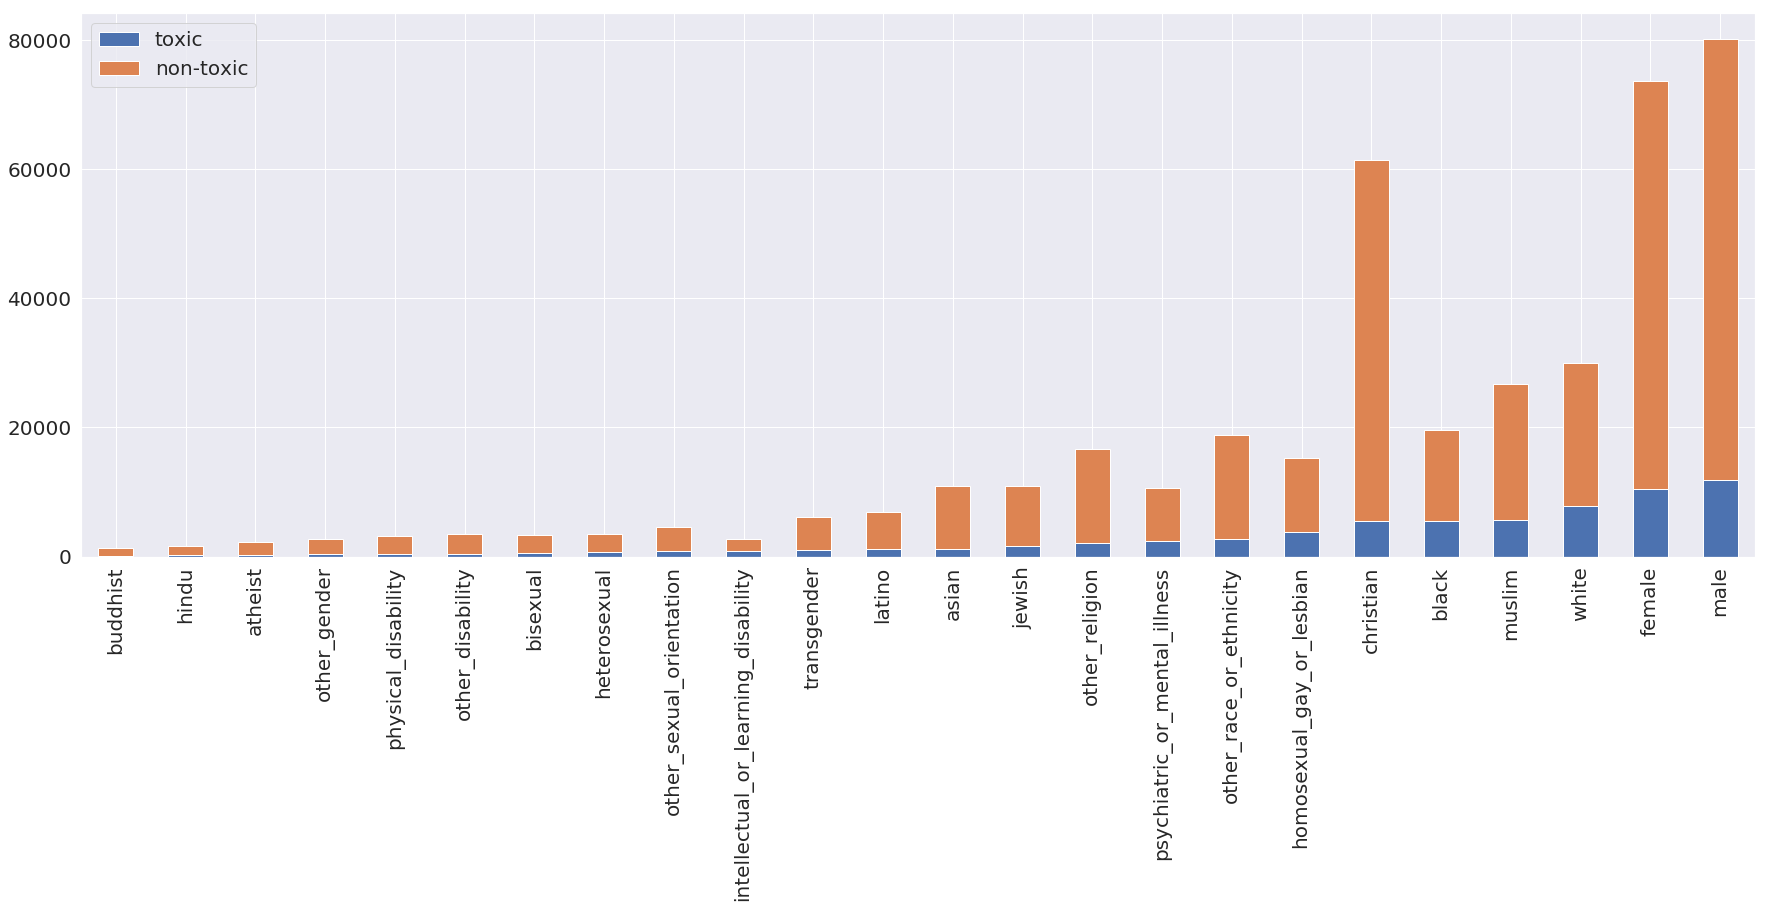

In [47]:
# here we plot the stacked graph but we sort it by toxic comments to (perhaps) see something interesting
toxic_vs_non_toxic.sort_values(by='toxic').plot(kind='bar', stacked=True, figsize=(30,10), fontsize=20).legend(prop={'size': 20})
# 문법 설명 : 1. toxic_vs_non_toxic dataframe 을 toxic 수치 기준으로 정렬.
# 문법 설명 : 2. plot() 의 파라미터 kind = bar, stacked = true

# 아래 그래프를 통해 알 수 있는 사실 : 사실 별거 없다. 그런데 toxic과 non toxic 간에 별로 상관관계가.. bar 의 높이는 총 언급량, 그 중에 toxic의 비율이 보인다.

The diagram above is certainly one way of looking at our data. However, it is missing the complete picture because we are not using two things. First, for each example we have a score (target) of how toxic the comment is. Second, each identity also has a value between 0 to 1 to identify how much they have been targeted. We can use this two aspects to our advantage and see which identities are more frequently related to toxic comments.

해석 : 위의 도표는 우리의 데이터를 바라보는 하나의 방법일 뿐이야.<br> 그러나, 이건 진짜 큰그림을 놓치고 있는거야. 왜냐면 우리가 바로 두 가지를 놓치고 있기 때문이지 <br>
첫째! 우리가 어떻게 댓글이 toxic 인지에 대한 score(target)을 활용하지 못하고 있다.<br> 댓글이 toxic 인것에도 종류가 많잖아? 또 얼마나 toxic 인지도 있겠고. <br>
둘째! 각 속성 (댓글에 남자가, 여자가, 트랜스젠더가, 종교가 언급되었는지 등..) 은 또한 얼마나 정확히 언급되었는지에 관련된 값을 가지고 있어. <br>
우리는 이 두 면을 우리에게 유리하게 적용할 수 있어. 어떤 속성(identity) 이 더 빈번하게 toxic comments 와 관련이 있는가 볼 수 있는거지.

In [48]:
# First we multiply each identity with the target
# 해석 : 일단 곱해 각 속성을 target 값과. 가중치를 주는거야.
weighted_toxic = train_labeled_df.iloc[:, 1:].multiply(train_labeled_df.iloc[:, 0], axis=0)
# 문법 설명 : 행렬[행 전체, 속성에 관한 열] * 상수[행 전체, target] **주의 : 행렬 곱이 아니고, 그냥 상수곱임!
# 문법 설명 : 곱하는 기준은 axis 주의할것!!

# 예시 상수 곱 axis = 0, 세로 방향. axis = 'index' 와 같은 것.
# men women transgender  target       men      women     transgender
# [1.0  , 0.3 , 0.8]    [ 0.2 ]   [1.0 * 0.2, 0.3 * 0.2, 0.8 * 0.2]
# |0.5  , 0.1 , 1.0| *  [ 0.5 ] = [0.5 * 0.5, 0.1 * 0.5, 1.0 * 0.5]
# [0.6  , 0.9 , 0.0]    [ 0.0 ]   [0.6 * 0.0, 0.9 * 0.0, 0.0 * 0.0]

# 예시 상수 곱 axis = 1
# men women transgender  target    
# [1.0  , 0.3 , 0.8]    [ 0.2 ]   
# |0.5  , 0.1 , 1.0| *  [ 0.5 ]
# [0.6  , 0.9 , 0.0]    [ 0.0 ] 
#         *
# [0.2  , 0.5 , 0.0]
#         ||
# [...  , ... , ...]
# [1.0  , 0.3 , 0.8]
# [1.0  , 0.3 , 0.8]
# 문제점 : train_label_df 의 column 개수와, target 의 데이터 개수가 다르기 때문에 곱셈이 불가능하다!



# [참고!!] 예시 행렬 곱.
# men women transgender  target
# [1.0  , 0.3 , 0.8]    [ 0.2 ]   [1.0 * 0.2 + 0.3 * 0.2 + 0.8 * 0.2]   []
# |0.5  , 0.1 , 1.0| *  [ 0.5 ] = [0.5 * 0.5 + 0.1 * 0.5 + 1.0 * 0.5] = []
# [0.6  , 0.9 , 0.0]    [ 0.0 ]   [0.6 * 0.0 + 0.9 * 0.0 + 0.0 * 0.0]   []

weighted_toxic = weighted_toxic.sum()
print(weighted_toxic, "\n\n")



# changing the value of identity to 1 or 0 only and get comment count per identity group
# 해석 : 속성값을 1이나 0으로 또 바꿔.
identity_label_count = train_labeled_df[identities].where(train_labeled_df == 0, other = 1).sum()



print(identity_label_count)



male                                   7928.729950
female                                 8957.565358
transgender                             642.028365
other_gender                             63.422483
heterosexual                            338.878355
homosexual_gay_or_lesbian              3124.373423
bisexual                                155.720793
other_sexual_orientation                129.479408
christian                              5260.915840
jewish                                 1524.066122
muslim                                 5222.213374
hindu                                    92.692775
buddhist                                 92.800914
atheist                                 229.391875
other_religion                          454.363364
black                                  4440.911818
white                                  6946.939644
asian                                   735.599032
latino                                  498.101285
other_race_or_ethnicity        

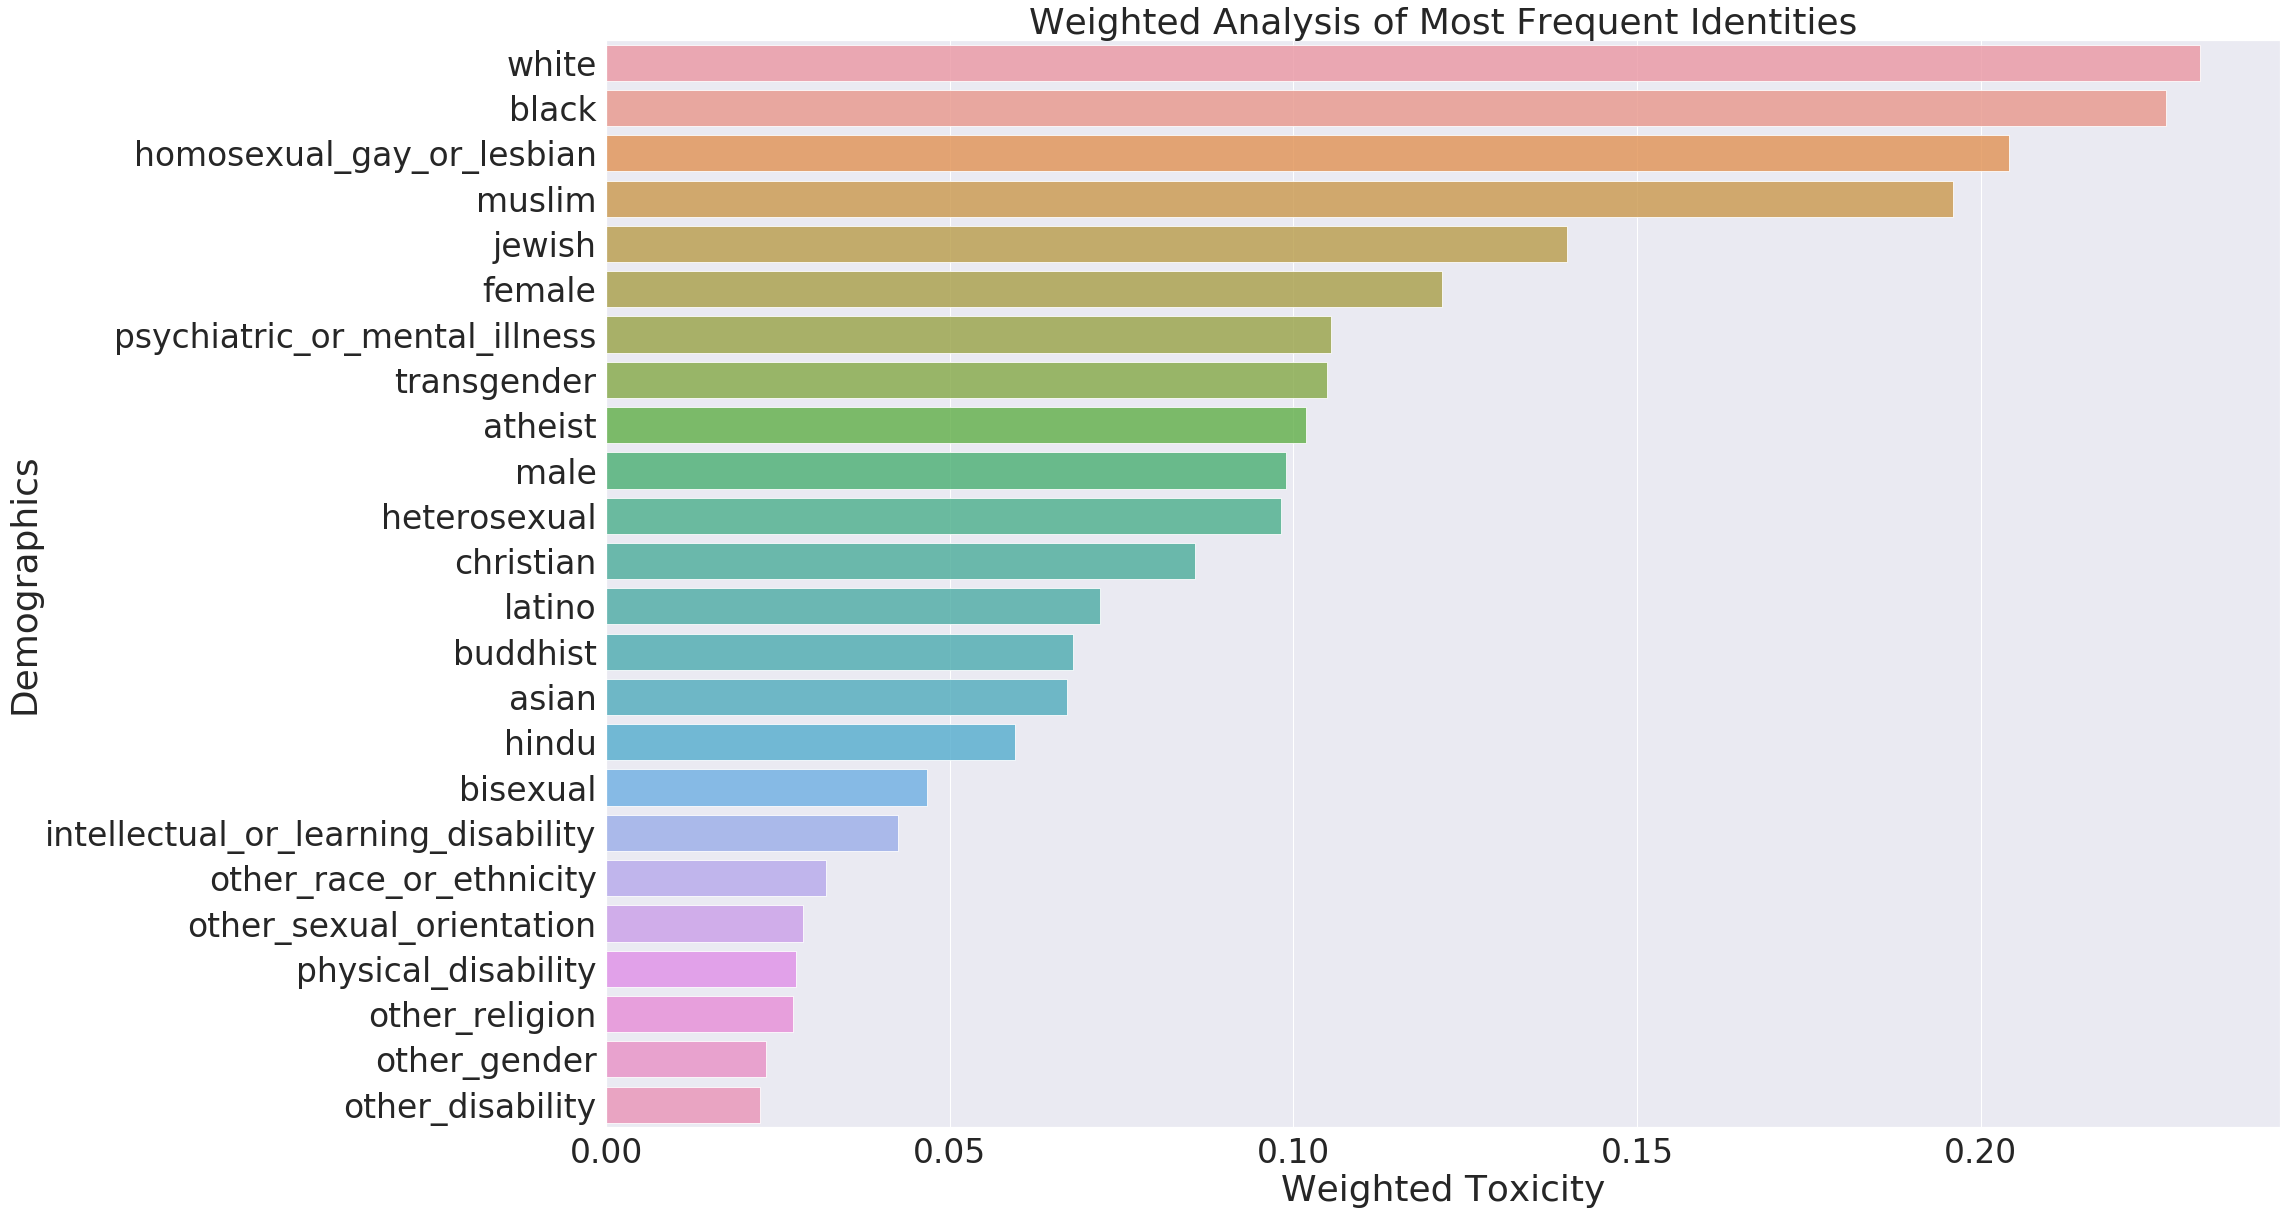

In [49]:
# then we divide the target weighted value by the number of time each identity appears
# 해석 : 그리고 우리는 weighted_toxic (곱의 결과를 모두 합한 것) 을 총 개수로 나눌 것이다.


# men women transgender  target       men      women     transgender
# [1.0  , 0.3 , 0.8]    [ 0.2 ]   [1.0 * 0.2, 0.3 * 0.2, 0.8 * 0.2]
# |0.5  , 0.1 , 1.0| *  [ 0.5 ] = [0.5 * 0.5, 0.1 * 0.5, 1.0 * 0.5]
# [0.6  , 0.9 , 0.0]    [ 0.0 ]   [0.6 * 0.0, 0.9 * 0.0, 0.0 * 0.0]
# __________________________________________________________________
# ________________________________[0.2+0.25+0,0.06+0.05+0,0.16+0.5+0]

weighted_toxic = weighted_toxic / identity_label_count
weighted_toxic = weighted_toxic.sort_values(ascending=False)
# plot the data using seaborn like before
# 해석 : Seaborn 라이브러리를 사용하여 전처럼 plot 할 것이다.


plt.figure(figsize=(30,20))
sns.set(font_scale=3)
ax = sns.barplot(x = weighted_toxic.values , y = weighted_toxic.index, alpha=0.8)
plt.ylabel('Demographics')
plt.xlabel('Weighted Toxicity')
plt.title('Weighted Analysis of Most Frequent Identities')
plt.show()

As we can see from the graph above, the two race based identities (White and Black) and religion based identities (Muslim and Jews) are heavily associated with toxic comments. <br>

해석 : 그래프에서 보이듯이, 두 인종 identities  그리고, 종교 기반의 identities 가 toxic comments 에 강한 연관성이 있었다. 

## Section 3: Time Series Analysis
The dataset also has a 'created_date' field, which tells us when the comment was made. We can use this field to do some time series analysis. In this section, we will also use plotly for simplifying our visualization needs.**

해석 : 데이터셋은 또한, 생성일자 column 이 있는데, 이건 댓글이 언제 작성되었는지 알 수 있어. 우리는 시간 분석에 이 필드를 사용할 수 있어. 이 section 에서는, 우리의 시각적 필요를 만족시키기 위해서 plotly 를 사용할거야. 


In [50]:
# lets take the dataset with identitiy tags, created date, and target column
# 해석 : 우리 identity 에다가 target 이랑 생성일자 column 을 합친 dataframe 을 하나 만들자.
with_date_df = train_df.loc[:, ['created_date', 'target'] + identities].dropna()
    


In [63]:

# next we will create a weighted dataframe for each identity tag (like we did before)
# first we divide each identity tag with the total value it has in the dataset
# 해석 : 그리고 우리는 아까 했던 것처럼 각 identity 속성에다가 가중치가 적용된 dataframe 을 만들거야.
# 해석 : 우선 우리는 각 identity 속성을 total value 로 나누어 줄 거야. 근데 이짓을 왜 하는거지..?

weighted_df = with_date_df.iloc[:, 2:] / with_date_df.iloc[:, 2:].sum()
# 추가 설명 : with_date_df의 column 2~ 는 속성값들 각각
# 추가 설명 : with_date_df.iloc[:, 2:].sum() 는 각 속성값들의 총합값을 반환.
# 추가 설명 : 즉, 저 연산을 수행하면, 각 속성의 총 값에 대한 각 댓글의 속성값의 티오가 나타남. 이지랄 왜한거지 근데?
# 추가 설명 : 아마도, 보통 댓글에 남자가 존나 나옴. 댓글 10개중에 10개꼴로 나옴. 그렇다면, 각 댓글이 수치는 1/10 이 되겟지.
#            반면, 10개중에 1개만 나오는데, 이 댓글에 남자가 나왔다. 그러면 이 댓글의 weighted 값은 1이 될 것.



In [66]:
# then we multiplty this value with the target 
# 해석 : 그리고 우리는 이걸 곱해줄거야. target 값이랑. 이것도 왜 하는거지?
target_weighted_df = weighted_df.multiply(with_date_df.iloc[:, 1], axis="index")
# 오옷 : 위에 weighted_df 로 각 댓글이 얼마나 자주 출몰하는데 이 댓글에 출몰하는지.. 와 같은 값으로 데이터를 만들었지.
#       그런데 이 데이터는, 그렇게 가끔 나왔는데 이게 독성이 얼마나 강한지 안 나타나 있어
#       그렇다면 이 데이터 전부를 그 댓글의 독성값이랑 곱해 준다고 생각해 보자. 
#       예를 들어, hindu 가 댓글 10개 중 1번 출현하는데, 이 댓글이 그 유일한 댓글이야. 그렇다면, 1/1 이니까 1이겠네. 이게 독성이 1이라면.. 1이되겠지
#       반대예로, jesus 가 댓글 10개 중 5번 출현하는데, 이 댓글이 그 5개중 하나야. 그렇다면 1/5, 이 댓글의 독성이 0.1 이라면, 0.2 * 0.1 = 0.02
#       즉, 이 연산을 수행하면, 댓글이 "가끔씩 나올수록" , 댓글의 "독성이 높을수록" 더 높은 수치를 적어 버린다고 해석 하면 된다.





# lets add a column to count the number of comments
# 해석 : comment 의 개수를 세기 위한 새로운 column 을 만들거야. 1로 초기화하네. 
# 오옷 : 이렇게 column 에 1을 추가해서 sum 을 해 주는 방법도 상당히 인상깊다.
target_weighted_df['comment_count'] = 1


# now we add the date to our newly created dataframe (also parse the text date as datetime)
# 해석 : 그리고 우리는 새롭게 만들어진 dataframe 에 날짜를 더할거야.

target_weighted_df['created_date'] = pd.to_datetime(with_date_df['created_date'].apply(lambda dt: dt[:10]))
# 문법 설명 : apply() : 
# Invoke function on values of Series. "Series 의 값들에 함수를 집어넣습니다."
# Can be ufunc (a NumPy function that applies to the entire Series) or a Python function that only works on single values
# "Series 전체에 적용되는 넘파이 함수들이나 단일 값들에 적용되는 함수들을 모두 사용할 수 있습니다." 라고 하는듯?
# 문법 설명 : lambda X : whatisX
# dataframe.lambda 는 apply 와 함께 쓰였기 때문에, dataframe 을 그대로 X에 대입합니다. datetime 은 년-월-일 시간-분-초 로 이루어져 있기 때문에,
# 그것을 깔끔하게 보기 위하여 [:10] 으로 쪼개서 return 해주는 것. 그것이 datetime 객체? 자료형? 으로 변환도어서 target_weighted_df['created_date']
# 에 덮어쓰기된다.




# now we can do a group by of the created date to count the number of times a identity appears for that date
# 해석 : 이제 우리는 group 지을 수 있어. created date 를 기준으로. 그 날에 그게 몇번이나 나타났는지 셀 수도 있고.
identity_weight_per_date_df = target_weighted_df.groupby(['created_date']).sum().sort_index()

# 문법 설명 : created_date 기준으로 group 지어주고, 그 group 각각을 sum 해준 후, index 기준으로 sort해줌. 
# groupby 를 해 주었으니, index 가 created_date 기준으로 바뀌었나 봄.

# 생각 : 이걸 왜 하는 걸까... 아마도 그 날별로 이슈에 따라서 달라지는 속성이 있다고 생각을 했나 보지?
identity_weight_per_date_df.head()

,male,female,transgender,other_gender,heterosexual,homosexual_gay_or_lesbian,bisexual,other_sexual_orientation,christian,jewish,muslim,hindu,buddhist,atheist,other_religion,black,white,asian,latino,other_race_or_ethnicity,physical_disability,intellectual_or_learning_disability,psychiatric_or_mental_illness,other_disability,comment_count
created_date,,,,,,,,,,,,,,,,,,,,,,,,,
2015-09-29,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000507,0.0,0.0,33
2015-10-06,0.000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,15
2015-10-13,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,14
2015-10-27,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,6
2015-10-28,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1


In [67]:
# lets group most of the identities into three major categories as follows for simplified analysis
# 해석 : 그룹을 세 중요한 요소로 만들어서 간단하 게 분석을 해 보자.
races = ['black','white','asian','latino','other_race_or_ethnicity']
religions = ['atheist', 'buddhist', 'christian', 'hindu', 'muslim', 'jewish','other_religion']
sexual_orientation = ['heterosexual', 'homosexual_gay_or_lesbian', 'bisexual', 'other_sexual_orientation']

In [68]:
# lets create a column to aggregate our weighted toxicity score per identity group
# 해석 : 우리 저 그룹에 대한 나머지 요소들의 그룹화를 위한 column 을 또 만들어 보자.

identity_weight_per_date_df['races_total'] = identity_weight_per_date_df[races].sum(axis=1)
identity_weight_per_date_df['religions_total'] = identity_weight_per_date_df[religions].sum(axis=1)
identity_weight_per_date_df['sexual_orientation_total'] = identity_weight_per_date_df[sexual_orientation].sum(axis=1)

Text(0, 0.5, 'Weighted Toxic Score')

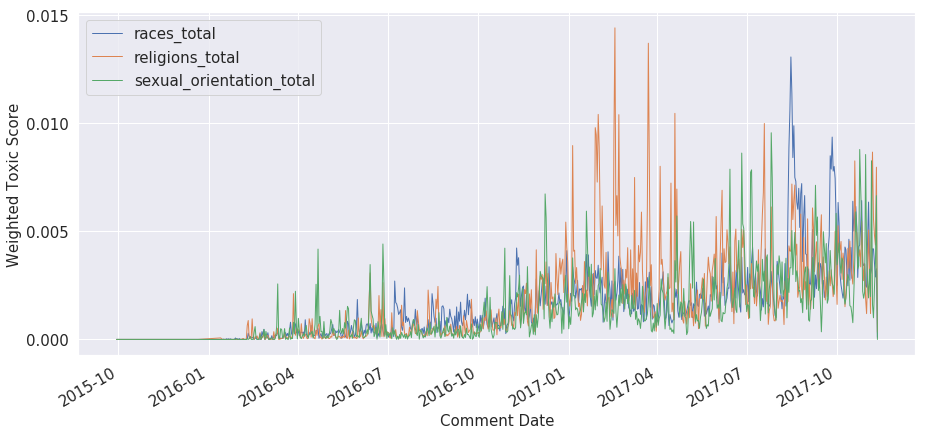

In [69]:
# and then plot a time-series line plot per identity group
# 해석 : 그리고 plot해! time-series 를 x축으로 한.
identity_weight_per_date_df[['races_total', 'religions_total', 'sexual_orientation_total']].plot(figsize=(15,7), linewidth=1, fontsize=15) 
plt.legend(loc=2, prop={'size': 15})
plt.xlabel('Comment Date', fontsize=15)
plt.ylabel('Weighted Toxic Score', fontsize=15)

# 문법 설명 : df[] 의 []안에는 column 이 들어가는데, 그것이 여러개니까 다시 배열로 묶어서 넣었음.
# 문법 설명 : 위 dataframe 은 index 가 datetime 이라서, plot 할때 그냥 뭐 별로 고려할 것 없이 잘 나와버렸음.

At first sight, what a sad graph to look at. First of all, there are many many spikes in our dataset, so we should zoom into each identity per group to see more. Furthermore, we notice a trend of more toxic messages as time goes by. What a depressing sight :( However, we should keep in mind that the distribution of data over the timeline is probably skewed. Lets check it out. <br>

해석 : 별 의미있는 결과를 얻지 못했다. 실망스럽다. <br>

Although there are many spikes in this dataset, there are two that really stands out to me.

해석 : 그러나 많은 spikes 가 dataset 에 나타났는데, 뭐 두개가 자기 눈에 띄었나봄 <br>


1. There huge spike of toxic comments against religion between 2017-01 to 2017-04. This might be because Donald Trump took office in January 2017, and during this time both people were very toxic toward various religions.


2. There is a big spike on toxicity towards races in the middle period between 2017-07 to 2017-10. I did a search on [Goolge Trends on topic that was probabily hot at that time, "black lives matter"](https://trends.google.com/trends/explore?date=2017-01-07%202017-12-31&geo=US&q=black%20lives%20matter). Over there we can see that there is a spike around 13th August 2017, which looks like the period we are interested in. Then I found an [aritlce](http://https://theweek.com/10things/713315/10-things-need-know-today-august-13-2017) from "The Week" that helped me understand this spike, as it summarizes all the major events from that week. At that time the "Charlottesville white nationalist rally", which probably the reason for this spike. <br>

해석 : 트럼프 이슈가 하나고.. 뭐 구글 트렌드에서 잘 찾아보니까 또다른 이슈 하나 찾았나봄. 그걸로 저 spike 를 이해할 수 있었다고. <br>


It isn't my intention to go through each spike and understand what happened there. **I rather wanted to convey the point that toxicity in the comments typically seems to be triggered or an aftermath of certain events.** A little intuative and obvious, but it's always good to point out the obvious with data.


해석 : 자기 의도가 아니었다고 함. 자기 의도는, 댓글에 들어있는 독성이 전형적으로 특정한 사건 이후에 나타났을 것이라고 생각했기 때문인데...

Text(0, 0.5, 'Total Comments')

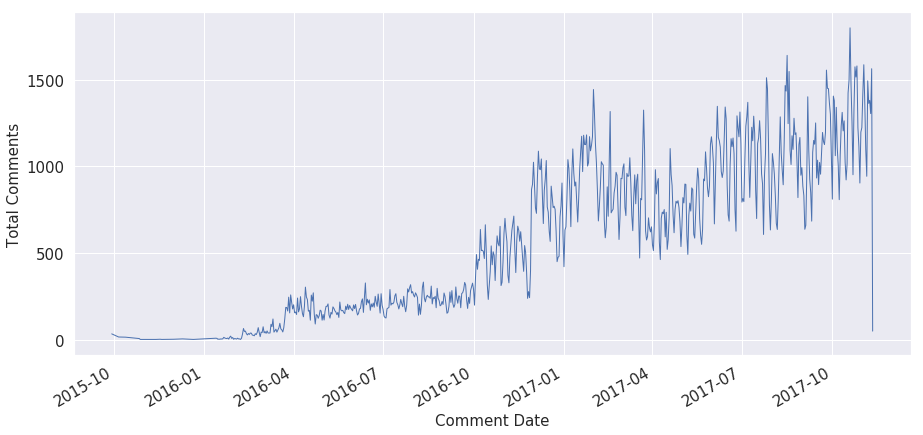

In [56]:
identity_weight_per_date_df['comment_count'].plot(figsize=(15,7), linewidth=1, fontsize=15)
plt.xlabel('Comment Date', fontsize = 15)
plt.ylabel('Total Comments', fontsize = 15)

As we dont have an even distribution of data for our timeline, we can use the comment count to get a better relative weighted toxic score and see where the peaks are.


해석 : 우리가 별다른 분포를 찾아볼 수 없었기 때문에,  상대적 가중치가 적용된 toxic score 과 count 의 peak의 위치를 알기 위해 우리는 comment count 를 더 좋은 방법으로 사용할 수 있을 거야.

In [57]:
identity_weight_per_date_df['races_total']

created_date
2015-09-29    0.000000
2015-10-06    0.000000
2015-10-13    0.000000
2015-10-27    0.000000
2015-10-28    0.000000
2015-11-13    0.000000
2015-11-17    0.000000
2015-11-19    0.000000
2015-12-01    0.000000
2015-12-10    0.000000
2015-12-21    0.000000
2016-01-13    0.000000
2016-01-14    0.000000
2016-01-15    0.000000
2016-01-16    0.000012
2016-01-17    0.000000
2016-01-18    0.000000
2016-01-19    0.000030
2016-01-20    0.000000
2016-01-21    0.000029
2016-01-22    0.000000
2016-01-23    0.000026
2016-01-24    0.000000
2016-01-25    0.000000
2016-01-26    0.000000
2016-01-27    0.000000
2016-01-28    0.000067
2016-01-29    0.000000
2016-01-30    0.000030
2016-01-31    0.000000
                ...   
2017-10-13    0.004632
2017-10-14    0.002737
2017-10-15    0.004254
2017-10-16    0.002823
2017-10-17    0.006388
2017-10-18    0.005012
2017-10-19    0.005798
2017-10-20    0.006148
2017-10-21    0.005228
2017-10-22    0.002867
2017-10-23    0.004294
2017-10-24    0.00436

Text(0, 0.5, 'Relative Weighted Toxic Score')

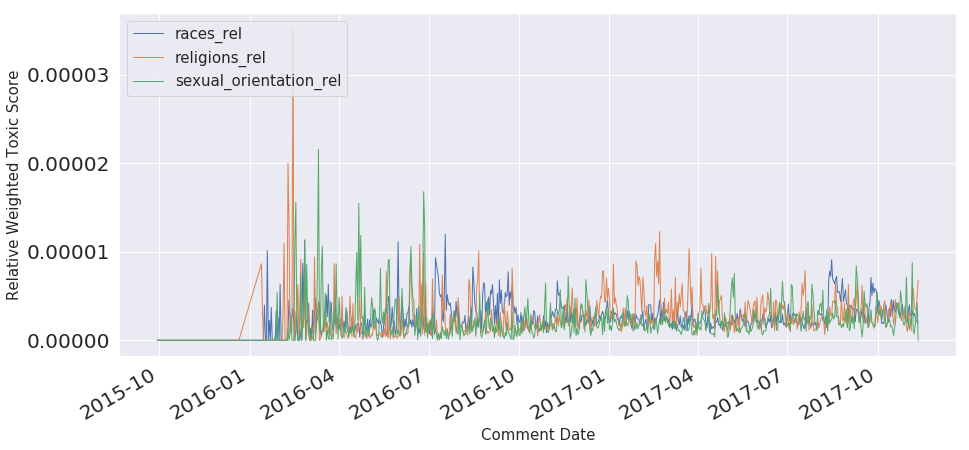

In [73]:
# lets divide by the comment count for the date to get a relative weighted toxic score
# 해석 : 우리 한번 comment count 로 나눠 보자.

identity_weight_per_date_df['races_rel'] = identity_weight_per_date_df['races_total'] / identity_weight_per_date_df['comment_count']
identity_weight_per_date_df['religions_rel'] = identity_weight_per_date_df['religions_total'] / identity_weight_per_date_df['comment_count']
identity_weight_per_date_df['sexual_orientation_rel'] = identity_weight_per_date_df['sexual_orientation_total']  / identity_weight_per_date_df['comment_count']
# 추가 설명 : 이런 방식으로 하는 이유가 무엇일까. 생각해 보자.


# 추가 설명 : ["identity"_rel] = [특정 날짜의 identity 수치] / [특정 날짜의 총 comment 개수] 즉, identity 수치가 5인데 comment 가 20개인것, 100개인것 생각해봐
# 즉, 이 데이터는, 특정 날짜에 그 identity 가 얼마나 큰 비중을 차지했느냐겠다.

# 추가 설명 : 특정 날짜의 identity 수치는, 위에 target_weighted_df 만들때, (전체중에 해당댓글이 차지하는속성비율)*해당댓글 독성 이었는데, 이걸 모두 더한것.
#            즉 이 수치는, 예를 들어 "모든 시간 중에 이게 가끔 출몰하고 가끔 출몰했더니 이 댓글에서 독성이 높다"  를 날짜 기준으로 더하고,
#            그날의 댓글 총 개수로 나눈다면 그 날에는 유독 이게 욕으로 많이 쓰이고, 어떤 날에는 유독 이게 욕으로 적게 쓰이고 하는 경향을 알 수 있겠지
#            Q. 날짜 기준으로 개수만 모조리 더한 것은 왜 지표가 되지 않는가? : A. 어느 날에는 댓글이 많고 어느 날에는 적을텐데, 어느 날에 hindu 가
#               독성이 없는데 많이 언급되어서 수치가 높게 나왔다면.. 이자체로 비교하긴 어렵겠지
# now lets plot the data

identity_weight_per_date_df[['races_rel', 'religions_rel', 'sexual_orientation_rel']].plot(figsize=(15,7), linewidth=1, fontsize=20)
plt.legend(loc=2, prop={'size': 15})
plt.xlabel('Comment Date', fontsize=15)
plt.ylabel('Relative Weighted Toxic Score', fontsize=15)

Text(0, 0.5, 'Relative Weighted Toxic Score')

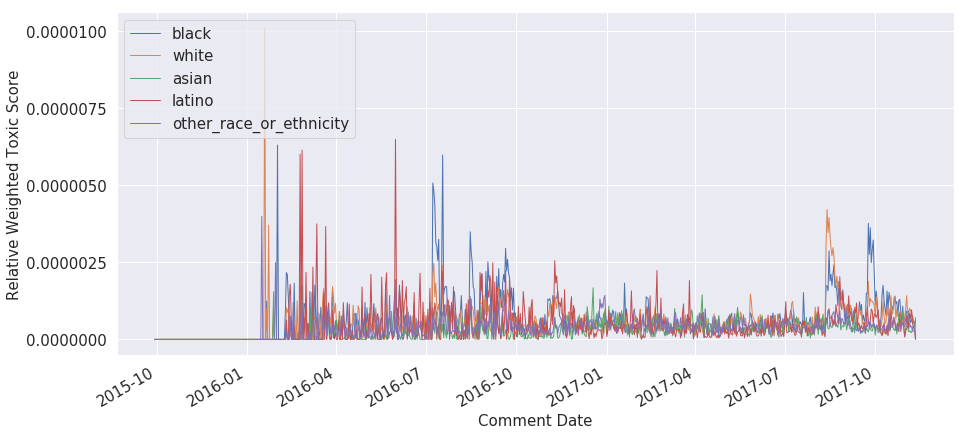

In [31]:
# lets plot relative weighted toxic score for each identity of races
identity_weight_per_date_df[races].div(identity_weight_per_date_df['comment_count'], axis=0).plot(figsize=(15,7), linewidth=1, fontsize=15)
plt.legend(loc=2, prop={'size': 15})
plt.xlabel('Comment Date', fontsize=15)
plt.ylabel('Relative Weighted Toxic Score', fontsize=15)

Text(0, 0.5, 'Relative Weighted Toxic Score')

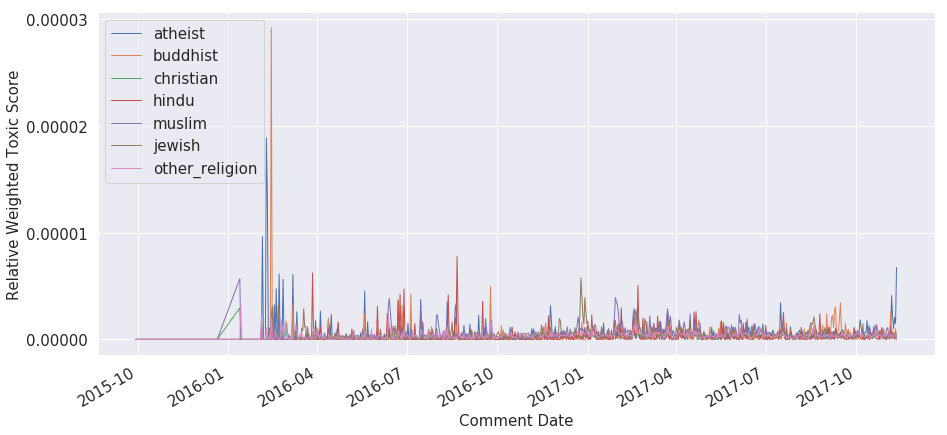

In [24]:
# lets plot relative weighted toxic score for each identity of religions
identity_weight_per_date_df[religions].div(identity_weight_per_date_df['comment_count'], axis=0).plot(figsize=(15,7), linewidth=1, fontsize=15)
plt.legend(loc=2, prop={'size': 15})
plt.xlabel('Comment Date', fontsize=15)
plt.ylabel('Relative Weighted Toxic Score', fontsize=15)

Text(0, 0.5, 'Relative Weighted Toxic Score')

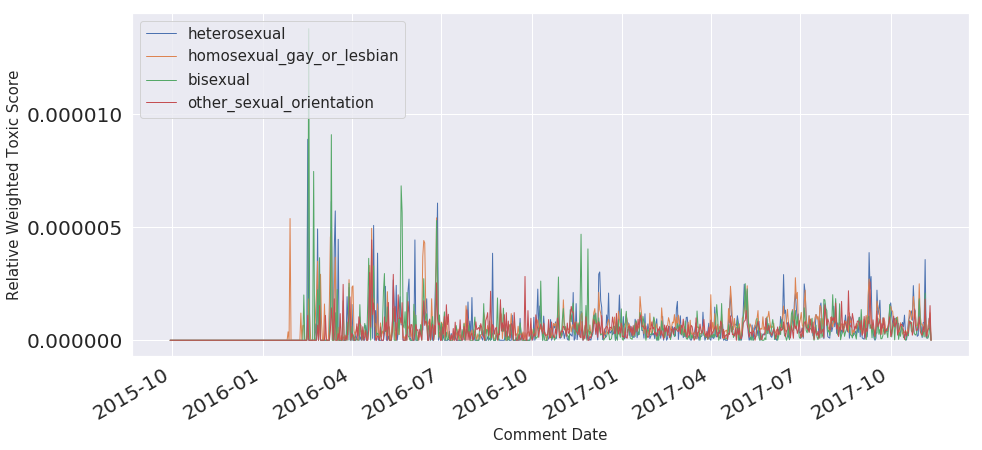

In [25]:
# lets plot relative weighted toxic score for each identity of sexual orientation
identity_weight_per_date_df[sexual_orientation].div(identity_weight_per_date_df['comment_count'], axis=0).plot(figsize=(15,7), linewidth=1, fontsize=20)
plt.legend(loc=2, prop={'size': 15})
plt.xlabel('Comment Date', fontsize=15)
plt.ylabel('Relative Weighted Toxic Score', fontsize=15)

Interesting! After looking at the visualization above, we can conclude the few following things:

* Amount of hate or toxic comments directed toward any of the group isn't constant
* The dataset is full of spikes or relative maximums
* This probably happens due to certain events that triggers hate toward a particular identity

해석 : 인상깊다! 위 표들을 통해서 아래 내용을 도출할 수 있었어.

* 어떤 속성 그룹도 toxic comments 와 직접적으로 연관되지 않았어
* dataset 은 spike 들로 가득했어
* 이것은 아마도 특정한 사건에 의해 일어났을 거야

## Section 4: Extracting the Peaks / Relative Maximums
As we saw in the last section, since there are so many spikes in our dataset, it is very easy to get distracted. To have a better idea we must zoom out. In this section we do that by extracting the peaks. This could be challenging, as we are not just looking for one global maximum. On the other hand, even if we sort it, we will not be able to find all the relative maximums without writing a complex algorithm to do so.

Fortunately, there is a great algorithm from **scipy** library called **'argrelextrema'** that will allow us to extract the relative maximum points from our dataset. For more details about this algorithm, check out the document section: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.argrelextrema.html



해석 : section 3 에서 보았듯이, 저기에 너무 많은 spike 들이 있었기에 굉장히 해석하는데 방해가 많이 됐어. 더 좋은 idea 를 얻기 위해는, 조금 더 거시적으로 봐야 해. 이 section 에서는 우리는 peak 를 제거해 버릴거야. 우리가 단지 하나의 global maximum 을 얻기 위한 것이기 때문에 이건 좀 어려울거야. 반면, 비록 우리가 이걸 잘 해낸다고 하더라도, 우리는 복잡한 알고리즘 없이 모든 relative maximum 을 알아내기 어려울거야. <br>
*relative maximum / local maximum : f와 f' 가 미분가능할때 f'(x) 가 0이고 f''(x) < 0 인 지점. 즉 주변에 비해 최댓값. 극댓값 <br>
*absolute maximum / global maximum : f와 f' 가 미분가능할때 f'(x) 가 0이고 f''(x) < 0 이며 정의역 전체(또는 특정 정의역 전체)에서 최댓값인 값. 


해석 : 다행히, "scipy" 로부터 온 좋은 알고리즘이 있어. "argrelextrema" 라고 불리는 좋은 알고리즘인데 이건 우리가 relative maximum 을 추출하는 것을 도와줘.

In [26]:
# lets import the algorithm
from scipy.signal import argrelextrema

Using this algorithm, we want to create a pandas dataframe to capture all the extreme points in our dataset that captures all the peak points per identity group. We will also want to do a scatter plot in the next section, and scatterplot implementation needs both values (x and y) to be numeric. So we also better create a column to represent the dates in a more numeric form. 

We can do this by taking the date of the first comment as our reference point, and counting how many days the comment was made from the first comment in our dataset. Therefore, in the end we should get a dataframe with the following columns:

| identity | created data | score | days_from_first |

In [ ]:
# we will store all the different datapoints in the following dataframe
peaks_df = pd.DataFrame()

# first we loop through all the different identities we are interested in
for col in races + religions + sexual_orientation:
    # we pass the values through the algorithm to get an index of the rel. maximums 
    _max_index = argrelextrema(identity_weight_per_date_df[col].values, np.greater, order=15)
    # we use the index returned to create a dataframe of the values for those index. in this case 
    # we are interested in the created date and the score, notice how the dataframe needs to be 
    # transformed because of the orientation of the arrays we started off with
    col_peaks_df = pd.DataFrame(data = [identity_weight_per_date_df.index[_max_index], identity_weight_per_date_df[col].values[_max_index]]).T
    col_peaks_df.columns = ['created_date','score']
    # we create a new column labeling the identity so we can track which peak came from which identity
    col_peaks_df['identity'] = col
    # and we keep appending to our main dataframe 
    peaks_df = peaks_df.append(col_peaks_df)
# lets set identity as our index and we are done
peaks_df = peaks_df.set_index('identity')

In [ ]:
# to count the number of days from the first comment, we take our labeled data and convert the created date column
comments_with_date_df = train_df.loc[:, ['created_date', 'target','comment_text'] + identities].dropna()
comments_with_date_df['created_date'] = pd.to_datetime(with_date_df['created_date'].apply(lambda dt: dt[:10]))
comments_with_date_df['comment_count'] = 1

In [ ]:
# calculate days from first comment
first_dt = min(comments_with_date_df['created_date'].values)
last_dt = max(comments_with_date_df['created_date'].values)
peaks_df['days_from_first'] = (peaks_df['created_date'] - first_dt).dt.days

In [ ]:
# here is a peak at what our peaks_df looks like
peaks_df.head()

## Section 5: Visualizing Relative Maximums

Scatter plot is typically used to show if there is a correlation between two variables. However, in this case, we can also use scatterplot to draw the relative maximums as descrete points. The nice thing about a scatter plot is that we can visualize a third variable as the size of the point. Let's take advantage of this and use the number of comments made as the size of the relative maximum points.

In [ ]:
# lets create a function that returns the peaks dataframe for a given identity
# we also want to get the number of toxic comments made against that identity in the dataframe
def get_identity_peaks_df(identity, peaks_df, comments_with_date_df):
    # select subset and sort
    identity_peaks_df = peaks_df[peaks_df.index==identity].sort_values(by='score', ascending=False)
    # change the score type to float
    identity_peaks_df['score'] = identity_peaks_df.score.astype(float)
    # use created date as the index so we can join over in later step
    identity_peaks_df = identity_peaks_df.set_index('created_date')
    # calculate how many toxic comments were made targetting the given identity group
    identity_comment_count_df = comments_with_date_df[comments_with_date_df[identity] > 0][['created_date','comment_count']].groupby('created_date').sum()
    # do an inner join to also get the total number of comments made that day for the given identity
    identity_peaks_df = identity_peaks_df.join(identity_comment_count_df)
    return identity_peaks_df

In [ ]:
# to make our scatter plot more presentable we will set the max and min of our y axis
y_lim_min = peaks_df['score'].max() + peaks_df['score'].max() / 3 # adding a little bit head room on y axis
y_lim_max = peaks_df['score'].min() 

In [ ]:
# now lets write a function that draws the scatter plot for a given identity
def identity_scatter_plot(identity, identity_peaks_df, y_lim_min, y_lim_max):
    x = identity_peaks_df['days_from_first'].values
    y = identity_peaks_df['score'].values
    size = identity_peaks_df['comment_count'].values
    label = identity_peaks_df['comment_count'].index
    plt.figure(figsize=(15,7))
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.scatter(x, y, s=size, label=label)
    plt.ylim(y_lim_max, y_lim_min)
    axis_font = {'fontname':'Arial', 'size':'14'}
    plt.title('Relative Maximums - Targeted Against '+ identity.capitalize() +' Identity', fontsize=15)
    plt.xlabel('Comment Date', fontsize=15)
    plt.ylabel('Relative Weighted Toxic Score', fontsize=15)

Now we are ready to plot each relative maximums per identity group. However, lets only look at top 5 for now. If you remember the horizontal bar plot we did at the start of our tutorial (second graph from the top), you can see that the identities that are most frequently targeted are white, black, homosexual_gay_or_lesbian, muslim, and jewish.

In [ ]:
identity = 'white'
identity_peaks_df = get_identity_peaks_df(identity, peaks_df, comments_with_date_df)
identity_scatter_plot(identity, identity_peaks_df, y_lim_min, y_lim_max)

In [ ]:
identity = 'black'
identity_peaks_df = get_identity_peaks_df(identity, peaks_df, comments_with_date_df)
identity_scatter_plot(identity, identity_peaks_df, y_lim_min, y_lim_max)

In [ ]:
identity = 'homosexual_gay_or_lesbian'
identity_peaks_df = get_identity_peaks_df(identity, peaks_df, comments_with_date_df)
identity_scatter_plot(identity, identity_peaks_df, y_lim_min, y_lim_max)

In [ ]:
identity = 'muslim'
identity_peaks_df = get_identity_peaks_df(identity, peaks_df, comments_with_date_df)
identity_scatter_plot(identity, identity_peaks_df, y_lim_min, y_lim_max)

In [ ]:
identity = 'jewish'
identity_peaks_df = get_identity_peaks_df(identity, peaks_df, comments_with_date_df)
identity_scatter_plot(identity, identity_peaks_df, y_lim_min, y_lim_max)

This is great! I will write down the analysis later! Meanwhile, if you have a great observation, write it down in the comment section =) 

## Section 6: Correlation and Heatmap of Identities

To better understand the dataset, we need to look at the correlation between each identities. Thus, in this section we will calculate the correlation between each of the identities and see if identities are often mentioned together. We are also interested to know which identities are frequently mentioned (or not mentioned) together. Understanding correlation for a large number of columns would be very difficult without visualization. However, this task is very simple once you draw a heatmap.

To do this we will use Seaborn, a library that wraps around matplotlib and makes plotting easier to use. The full documentation for plotting a heatmap for correlation matrix can be found in the [documentation](https://seaborn.pydata.org/examples/many_pairwise_correlations.html).

In [ ]:
# Lets import seaborn
import seaborn as sns

In [ ]:
# Compute the correlation matrix
corr = comments_with_date_df[identities].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
sns.set(font_scale = 1)
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The heatmap plot of the correlation between the identities is very insightful. I will summarize my observations below. As always, if you see something interesting please mention it to me in the comment section.
* It is interesting to see that strong correlations form triangular area at the edge of diagonal. 
* This basically means that there is a strong correlation between the groups of the identity (gender, religion, races, disabilities). This means, the comments where male identity is the target, female identity is also very likely to be the target.
* In another words, in toxic and non-toxic comments, **people tend to make it about one group vs another quiet frequently**.